In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import seaborn as sn

# load data

In [3]:
df = pd.read_csv(r'data\summary_df.tsv', sep='\t')
#num_predicted_values is already the sum of the predicted+original_ae_values 
df.sort_values(by='rmse_eqtl', ascending=True).head(10)

,tissue,rmse_train,rmse_test,rmse_eqtl,pearson_train,pearson_test,pearson_eqtl,num_ae_values,num_predicted_values,num_eqtl_predicted_values
6,BRNSPC,0.692836,1.057638,0.926598,0.878373,0.568297,0.743193,1180,2561,3205
7,LIVER,0.690014,0.971068,1.010824,0.873805,0.732457,0.712832,3417,5246,6027
4,BRNSNG,0.824291,1.124893,1.016156,0.851643,0.623237,0.693825,922,1866,2328
47,LCL,0.692422,1.053610,1.033033,0.882821,0.665639,0.715876,3906,5496,6174
38,ADRNLG,0.697629,1.020675,1.067232,0.865248,0.685128,0.705127,5076,7665,8878
26,OVARY,0.700634,1.116413,1.083108,0.867301,0.582188,0.639601,4085,5607,6420
42,BRNAMY,0.758959,1.051224,1.092886,0.832208,0.487693,0.546359,1403,2528,3085
29,BRNCHB,0.724370,1.097957,1.106152,0.839594,0.608160,0.622896,4585,7385,8684
34,SPLEEN,0.709147,0.948228,1.112243,0.847365,0.665384,0.653452,5069,7628,8902
19,BRNCDT,0.700544,1.020657,1.139327,0.842717,0.569146,0.565958,4061,6551,7771


# Number of predicted values

In [4]:
ratio = df['num_predicted_values']/df['num_ae_values']*100
total = df['num_predicted_values'] - df['num_ae_values']
print(np.mean(ratio), np.mean(total), np.mean(df.rmse_test))

156.79953820204034 2659.9375 0.9746052163056681


## Fig. 6

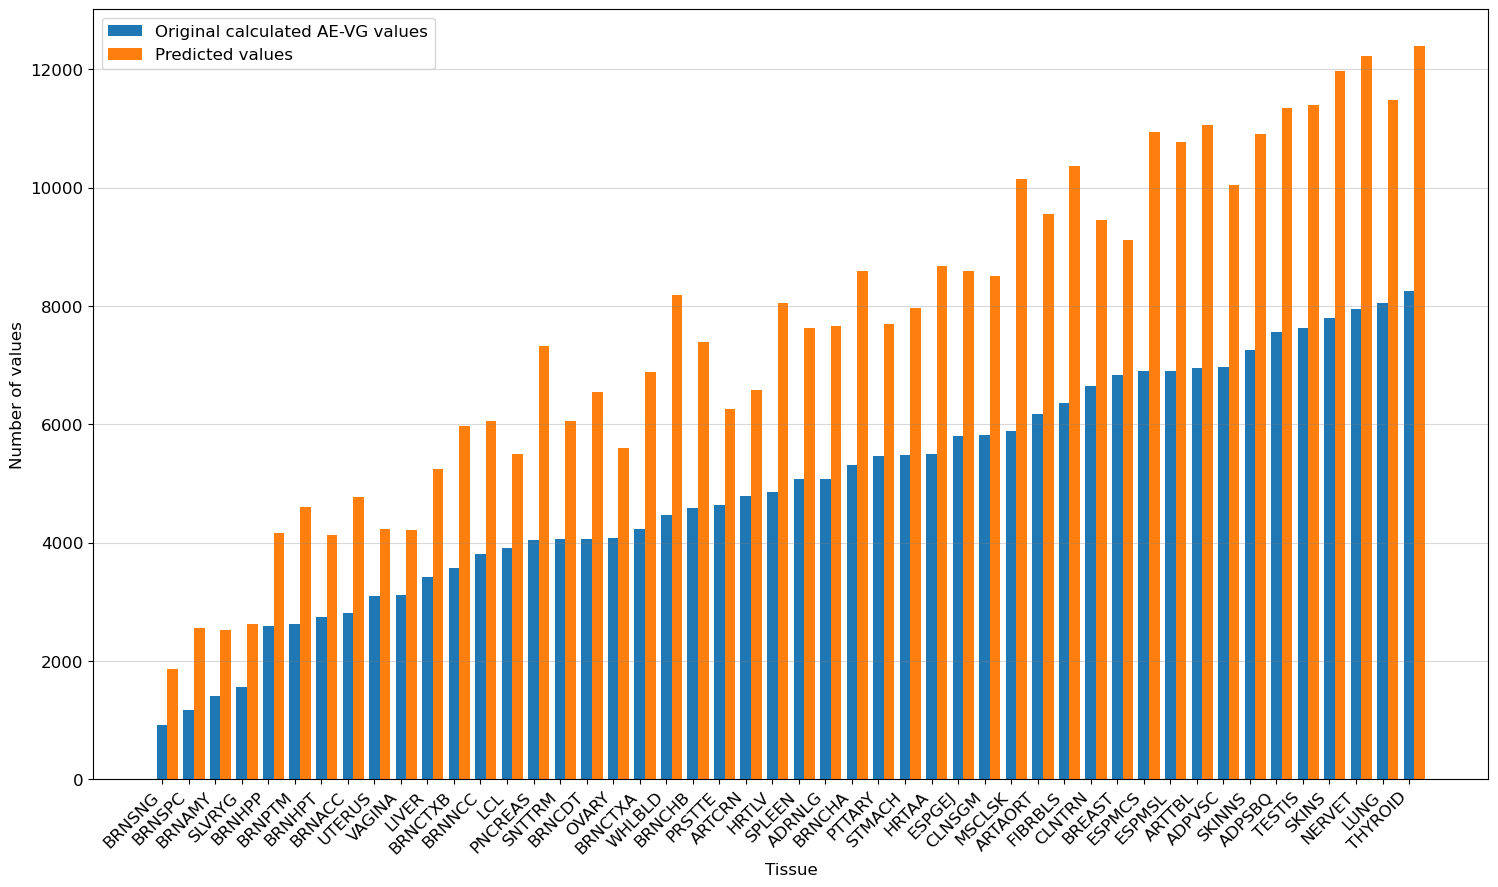

   tissue  num_ae_values
4  BRNSNG            922
     tissue  num_ae_values
17  THYROID           8257


In [5]:
df = df.sort_values(by='num_ae_values',ascending=True)
fig, ax = plt.subplots(1,1,figsize = (18,10))# 
barwidth = 0.4
ax.bar(df.tissue, df.num_ae_values, width=barwidth, label='Original calculated AE-VG values')
ax.bar([i+ barwidth for i in np.arange(len(df.tissue))], df.num_predicted_values, width=barwidth, label='Predicted values')
plt.xticks(rotation=45, fontsize = 12, ha='right')
plt.yticks(fontsize=12)
ax.set_xlabel('Tissue', fontsize=12)
ax.set_ylabel('Number of values', fontsize=12)
plt.grid(axis='y', color='grey', alpha=0.3)
plt.legend(fontsize=12)
# plt.savefig(r'datacollection\images\final_report\number_of_values_per_tissue.png', dpi = 600)

# plt.savefig(r'datacollection\images\final_report\number_of_values_per_tissue_test.svg', dpi = 96,bbox_inches='tight')
plt.show()
print(df.loc[df['num_ae_values']==np.min(df.num_ae_values),['tissue', 'num_ae_values']])
print(df.loc[df['num_ae_values']==np.max(df.num_ae_values),['tissue', 'num_ae_values']])



# correlation of dataset size with Root Mean Squared Error (RMSE) of predictions

## Fig. 7A

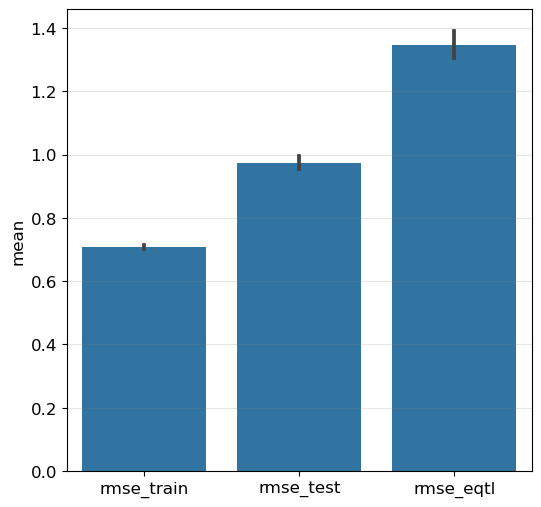

SEM  rmse_train :  0.005143683066943279
SEM  rmse_test :  0.020206278705333716
SEM  rmse_eqtl :  0.04251004595224404


In [6]:
perf_metrics = df.columns[1:4] 
# means = [np.mean(df[i]) for i in df[perf_metrics]]
data = df[perf_metrics]
fig, ax = plt.subplots(1,1, figsize = (6,6))
p = sn.barplot(data=data, estimator='mean' , ax = ax, errorbar='se', color='#1f77b4')
plt.xticks(fontsize = 12, ha='center')
plt.yticks(fontsize=12)
# ax.set_xlabel('metric', fontsize = 12)
ax.set_ylabel('mean',fontsize = 12)
plt.grid(axis='y', color='grey', alpha=0.2)

# plt.savefig(r'datacollection\images\final_report\mean_performances.png', dpi = 600)
# plt.savefig(r'datacollection\images\final_report\mean_performances.svg', dpi = 96,bbox_inches='tight')

plt.show()
sems = [np.std(data[i], ddof=1) / np.sqrt(np.size(data[i])) for i in data.columns]
for i,v in enumerate(sems):
    print('SEM ',data.columns[i], ': ', v)


## Fig. 7B


(-0.8133604828173919, 2.145949820269869e-12)


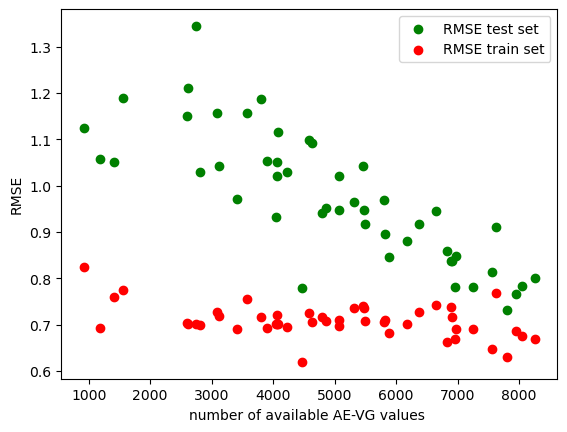

In [7]:
plt.scatter(df.num_ae_values,df.rmse_test, color = 'green', label='RMSE test set')
plt.scatter(df.num_ae_values,df.rmse_train, color = 'red', label='RMSE train set')
# plt.scatter(df.num_ae_values,df.rmse_eqtl, color = 'blue', label='RMSE eQTL')
plt.xlabel('number of available AE-VG values ')
plt.ylabel('RMSE')
plt.legend()
# plt.savefig(r'datacollection\images\final_report\RMSE_vs_number_values.png', dpi = 300)
# plt.savefig(r'datacollection\images\final_report\RMSE_vs_number_values.svg', dpi = 96,bbox_inches='tight')
from scipy.stats import pearsonr
print(pearsonr(df.num_ae_values,df.rmse_test))
plt.show()

In [8]:
# perf_metrics = df.columns[1:4] 
means = [np.mean(df[i]) for i in df[perf_metrics]]
print([(i,j) for (i,j) in zip(perf_metrics, means) ])

[('rmse_train', 0.7080839243785952), ('rmse_test', 0.974605216305668), ('rmse_eqtl', 1.3476095724777375)]
